<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos, denominado `vehiculos_procesado_con_grupos.csv`, contiene algunas de las características más importantes de los vehículos. El objetivo de este ejercicio es clasificar los vehículos en diferentes categorías, basándonos en las características que se describen a continuación. 

El desafío de este ejercicio radica en la combinación de variables numéricas y categóricas, lo que añade complejidad al análisis.

Lo primero que haremos será cargar el conjunto de datos:

**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

In [47]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 

In [48]:
df_numerical = df.select_dtypes(include = 'number')
df_categorical = df.select_dtypes(exclude='number')
df_numerical.fillna(df_numerical.mean(), inplace=True)
scaler = MinMaxScaler()
scaler.fit(df_numerical)
df_numerical = pd.DataFrame(scaler.transform(df_numerical), columns= df_numerical.columns)
#Get Dummies toma los valores que puede tomar cada columna y crea una columna nueva booleana que te indica si la columna toma ese valor o no. Es decir, si hay 3 tipos de auto, entonces se crean 3 columnas nuevas, donde cada una indica es binaia e indica si el auto es de ese tipo o no.
df_categorical = pd.get_dummies(df_categorical).astype(int)
df_procesado = pd.concat([df_categorical,df_numerical], join= 'inner',axis =1)
df_procesado.columns = df_procesado.columns.astype('str')
df_procesado

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0.000000,0.461538,0.285714,0.527672,0.475113
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0.029412,0.243590,0.142857,0.424351,0.360294
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0.029412,0.461538,0.285714,0.527672,0.475113
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0.970588,0.038462,0.071429,0.176532,0.090196


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [59]:
km = KMeans(8,random_state=23)
df_procesado['kmeans'] = km.fit_predict(df_procesado)
columns_num = df_numerical.columns

means = df_procesado.groupby('kmeans')[columns_num].mean()
modes = df_procesado.groupby('kmeans')[columns_num].agg(lambda x: x.mode().iloc[0])
print(means)
print(modes)

            year  desplazamiento  cilindros       co2  consumo_litros_milla
kmeans                                                                     
0       0.594201        0.624117   0.483837  0.503603              0.441553
1       0.430936        0.310256   0.240900  0.333166              0.257574
2       0.569936        0.169558   0.145976  0.240831              0.156365
3       0.479516        0.447390   0.325540  0.410151              0.344373
4       0.430576        0.225326   0.174853  0.304584              0.226503
5       0.313071        0.548444   0.383841  0.507836              0.453114
6       0.583538        0.360318   0.298784  0.354134              0.282345
7       0.659398        0.295526   0.226007  0.332589              0.257949
            year  desplazamiento  cilindros       co2  consumo_litros_milla
kmeans                                                                     
0       0.705882        0.717949   0.428571  0.488312              0.393464
1       0.00

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

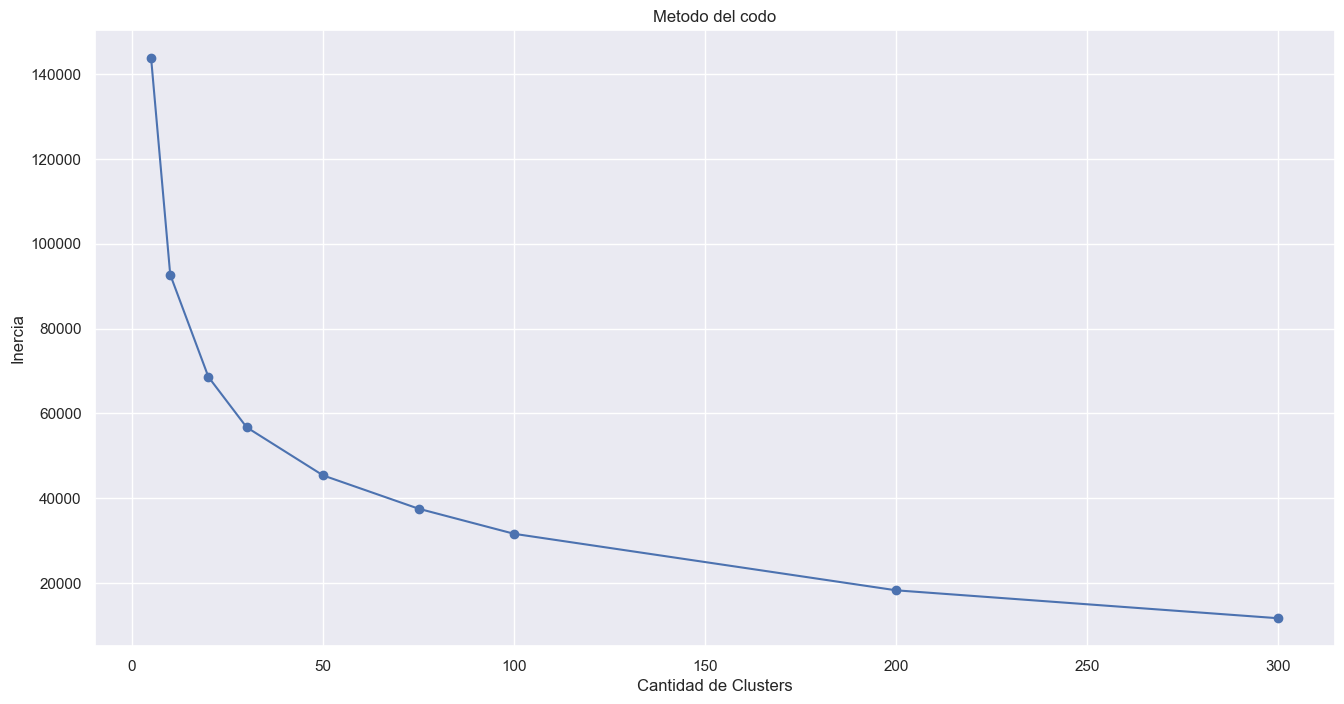

In [62]:
n_clusters = [5, 10, 20, 30, 50, 75, 100, 200, 300]
inercias = []
for i in n_clusters:
    km = KMeans(n_clusters= i, random_state=23)
    km.fit(df_procesado)
    inercias.append(km.inertia_)
plt.figure(figsize=(16,8))
plt.plot(n_clusters, inercias, marker= 'o')
plt.xlabel('Cantidad de Clusters')
plt.ylabel('Inercia')
plt.title('Metodo del codo')
plt.grid(True)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

Segun lo observable en el gráfico, se empieza a estabilizar al rededor del 5to punto, es decir, con 50 clusters.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 



In [63]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [64]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

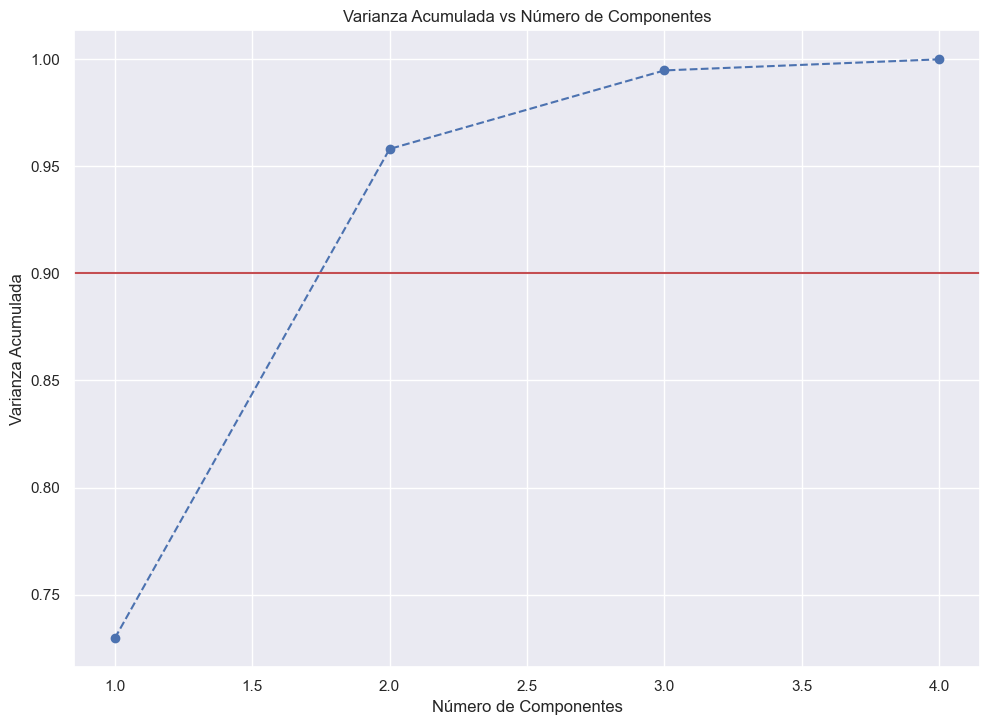

In [67]:
from sklearn.preprocessing import StandardScaler
# PCA
#Primero estandarizar
X = iris[features]
y = iris[target]
scaler = StandardScaler()
X = scaler.fit_transform(X)
#Ajustar sin especificar
pca = PCA()
pca.fit(X)
#Varianza acumulada
var_acum = np.cumsum(pca.explained_variance_ratio_)
#Encontrar el miinimo de componentes para alcanzar el 90% de varianza acumulada
n_components = np.argmax(var_acum >= 0.90) + 1
plt.plot(range(1, len(var_acum) + 1), var_acum, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada vs Número de Componentes')
plt.grid(True)
plt.show()

Notamos aquí que con los primeros dos componentes se alcanza el 90% de varianza, es decir, el elemento que más varianza añade a la varianza de los datos es el largo del cépalo. Esto también nos dice que basta con tomar el largo del cépalo y el ancho del cépalo para tener un analisis significativo.

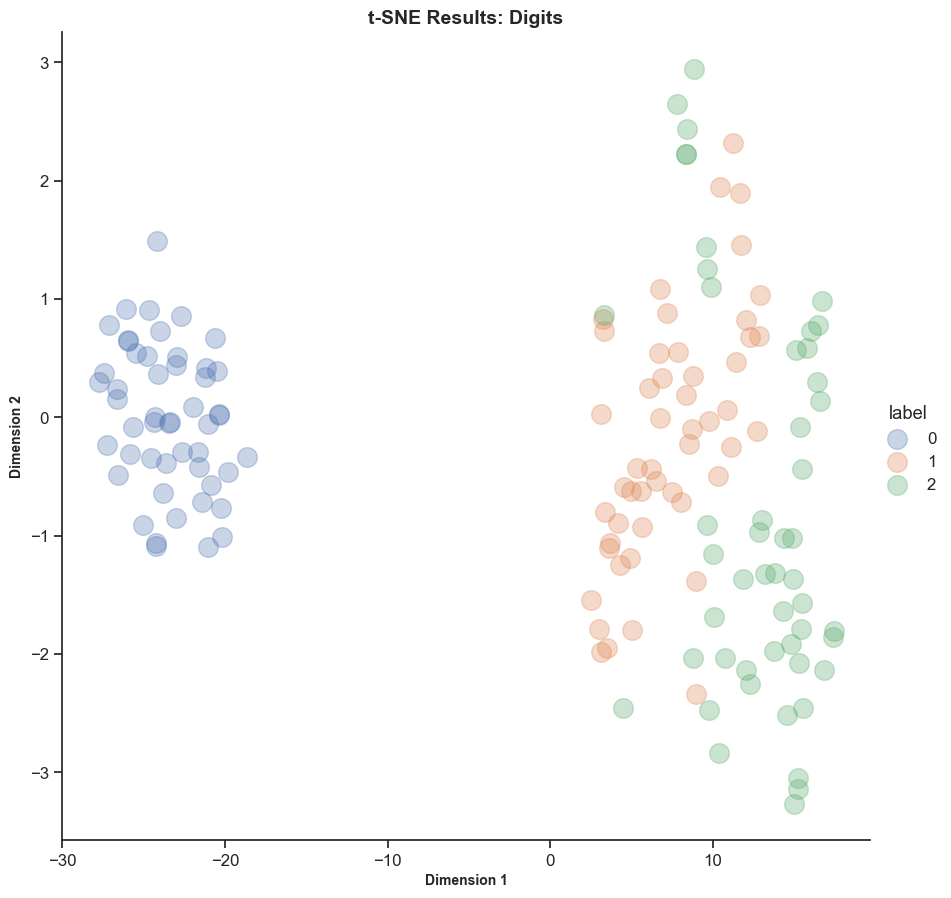

In [69]:
#TSNE
# Aplicar t-SNE con 2 componentes
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = y

# Visualización
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Aqui podemos ver que al separar con TSNE se tienen dos grupos distintivos, donde el tipo 0 de flor esta separado de los otros dos tipos, pero los tipos 1 y 2 no son facilmente separables en dos dimensiones.